In [0]:
!pip install tensorflow==2.0.0

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

In [0]:
input_sequences[0]

In [0]:
l = corpus[0]

In [0]:
t = tokenizer.texts_to_sequences([l])[0]
t

In [0]:
input_sequences[0]

In [2]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-12-28 01:18:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-28 01:18:28 (99.5 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True))) # An LSTM Layer
model.add(Dropout(0.2)) # A dropout layer
model.add(LSTM(100)) # Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) # A Dense Layer
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Pick a loss function and an optimizer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [6]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 67s 4ms/sample - loss: 6.8983 - accuracy: 0.0216
Epoch 2/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.4987 - accuracy: 0.0220
Epoch 3/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.3947 - accuracy: 0.0246
Epoch 4/100
15462/15462 [==============================] - 62s 4ms/sample - loss: 6.2661 - accuracy: 0.0332
Epoch 5/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 6.1634 - accuracy: 0.0369
Epoch 6/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 6.0768 - accuracy: 0.0407
Epoch 7/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 5.9884 - accuracy: 0.0404
Epoch 8/100
15462/15462 [==============================] - 61s 4ms/sample - loss: 5.9031 - accuracy: 0.0474
Epoch 9/100
15462/15462 [==============================] - 60s 4ms/sample - loss: 5.8032 - accuracy: 0.0528
Epoch

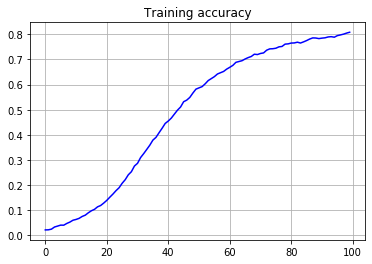

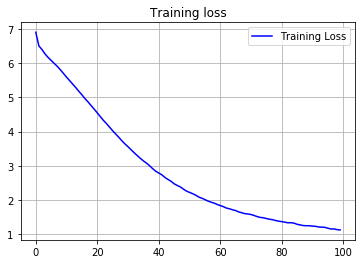

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.grid()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.grid()
plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope out men away ill ill leaves end ' lend tell to hide thee die true aside tell me dear rhyme friend be told all heart made hence keep good faith directed held held held clearer light light appetite in love leaves friend doth take thee so great bright eye dost grew so quite delighted cured hid so offence luck bearing away true ' live so yet when is my mind ' lend be light held cured cured seen clearer away aside friend away away new rare quite taken grow hid so made seen true end ' live add a winter's
